# 手書き文字の分類

MNISTのデータは、手書きで書かれた数字を画像にした画像データ(image)と、その画像に書かれた数字を表すラベルデータ(label)から構成されます。

![](https://weblabo.oscasierra.net/wp-content/uploads/2017/08/python-ai-mnist-data-detail-1.png)

In [22]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # as_frame=FalseでDataFrame型ではなくndarray型で読み込む

c:\Users\AndoShuki\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


sklearn.datasetsを通じでMNISTをndarray型でデータが読み込まれます。
- ```data```キーは、インスタンスごと１行、特徴量ごとに1列という形の配列を格納する
- ```label``` キーは、ラベルの配列を格納する

In [23]:
print(mnist.data.shape) # (70000, 784) 70000枚の画像データ、1枚あたり28×28=784の画素データ
print(mnist.target.shape) # (70000,) 70000枚の画像データに対応するラベルデータ

(70000, 784)
(70000,)


つまり、70000個の画像データがあり、個々の画像には784個の特徴量があります。

各画像が$28 \times 28$ピクセルで、 個々の特徴量は$0$(白)から255(黒)までの値でピクセルの明度を表しています。

以下は、$0$番目のインスタンスの特徴量ベクトルを取り出して、$28 \times 28$配列の形に変換し、可視化すると、$5$のように見える数字が確認できます。

対応する$0$番目のラベルデータを確認すると、ラベルは$5$であることがわかりました。

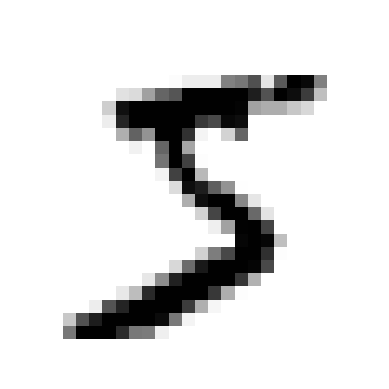

In [24]:
import matplotlib.pyplot as plt

some_digit = mnist.data[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [25]:
# 対応するラベルデータ
mnist.target[0] # 5

'5'

MNISTデータを用いて、手書き数字を識別機械学習モデルを構築、評価しなさい。

In [ ]:
#自力でモデルを構築するのは難しかったのでいくつかの文献やサイトを参考にしました。

In [20]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn
assert sklearn.__version__ >= "0.20"
import sys
assert sys.version_info >= (3, 5)


In [26]:
x, y = mnist["data"], mnist["target"]

In [27]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [28]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# 分類器を定義
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
#gb_clf = GradientBoostingClassifier(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=3)

# 投票分類器を定義
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rnd_clf),
        ('svc', svm_clf),
        ('dt', dt_clf),
        ('knn', knn_clf)],
    voting='soft')

c:\Users\AndoShuki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 9.994925260543823
RandomForestClassifier 69.81638646125793
SVC 1359.2924256324768
DecisionTreeClassifier 21.903323888778687
KNeighborsClassifier 0.3520548343658447


c:\Users\AndoShuki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 1511.980889081955


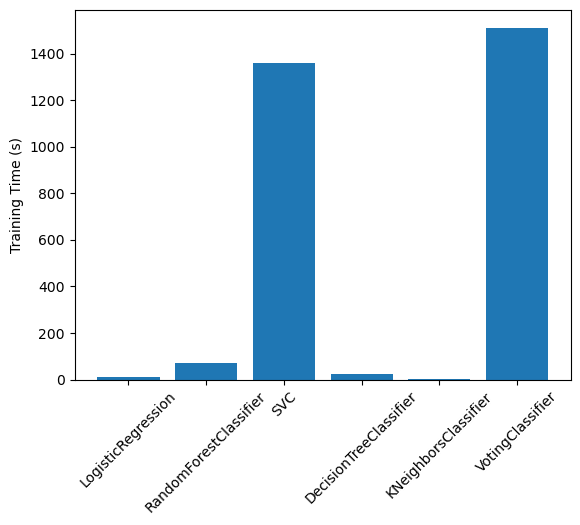

LogisticRegression 0.9255
RandomForestClassifier 0.9705
SVC 0.9792
DecisionTreeClassifier 0.8755
KNeighborsClassifier 0.9705
VotingClassifier 0.9746


In [29]:
classifiers = [log_clf, rnd_clf, svm_clf, dt_clf, knn_clf, voting_clf]

# 訓練時間を計測
import time
train_time = []
for clf in classifiers:
    start_time = time.time()
    clf.fit(x_train, y_train)
    end_time = time.time()
    print(clf.__class__.__name__, end_time - start_time)
    train_time.append(end_time - start_time)

# 訓練時間のグラフを表示
plt.bar(range(len(classifiers)), train_time)
plt.xticks(range(len(classifiers)), [clf.__class__.__name__ for clf in classifiers], rotation=45)
plt.ylabel("Training Time (s)")
plt.show()

# 分類器を訓練して性能を評価
for clf in classifiers:
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [1]:
#パターン2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
mnist = fetch_openml('mnist_784', version= 1, as_frame= False)
x, y = mnist["data"], mnist["target"]

c:\Users\AndoShuki\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
seed = 1
train_size = 5000
test_size = 100

x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size=train_size, test_size=test_size, random_state=seed, stratify=y)

In [4]:
x_train = x_train /255
x_test = x_test / 255

In [5]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [6]:
predicted = svm.predict(x_test)
score = svm.score(x_test, y_test)
print("score is {}".format(score))

score is 0.95
